# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.


Problem 3 (3 points): Implement KNN predict function code in HW1.pynb. Submit your code plus a PDF file
containing the outcomes of your code or a Jupyter notebook containing the outputs.

Q3 is a coding question and you need to write the code for the KNN function from scratch. You cannot use inbuilt KNN function from any library like scikit-learn. You can use the libraries for other functions.

In [0]:
from __future__ import print_function
import os
import numpy as np

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import pandas as pd

# Import the data using the file path
filepath = 'Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

print(data.head())

  state  account_length  ...  number_customer_service_calls churned
0    KS             128  ...                              1   False
1    OH             107  ...                              1   False
2    NJ             137  ...                              0   False
3    OH              84  ...                              2   False
4    OK              75  ...                              3   False

[5 rows x 21 columns]


In [3]:
data.head(21).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
state,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV,IN,RI,IA,MT,IA,NY,ID,VT,VA,TX,FL
account_length,128,107,137,84,75,118,121,147,117,141,65,74,168,95,62,161,85,93,76,73,147
area_code,415,415,415,408,415,510,510,415,408,415,415,415,408,510,415,415,408,510,510,415,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626,391-8027,355-9993,329-9001,335-4719,330-8173,329-6603,344-9403,363-1107,394-8006,366-9238,351-7269,350-8884,386-2923,356-2992,373-2782,396-5800
intl_plan,no,no,no,yes,yes,yes,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no
voice_mail_plan,yes,yes,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,yes,no,no
number_vmail_messages,25,26,0,0,0,0,24,0,0,37,0,0,0,0,0,0,27,0,33,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6,129.1,187.7,128.8,156.6,120.7,332.9,196.4,190.7,189.7,224.4,155.1
total_day_calls,110,123,114,71,113,98,88,79,97,84,137,127,96,88,70,67,139,114,66,90,117
total_day_charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96,21.95,31.91,21.9,26.62,20.52,56.59,33.39,32.42,32.25,38.15,26.37


In [0]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [5]:
data.columns
print(data.head(1).T)

                                   0
account_length                   128
intl_plan                         no
voice_mail_plan                  yes
number_vmail_messages             25
total_day_minutes              265.1
total_day_calls                  110
total_day_charge               45.07
total_eve_minutes              197.4
total_eve_calls                   99
total_eve_charge               16.78
total_night_minutes            244.7
total_night_calls                 91
total_night_charge             11.01
total_intl_minutes                10
total_intl_calls                   3
total_intl_charge                2.7
number_customer_service_calls      1
churned                        False


* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [0]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data), #,
                    columns=data.columns)

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.

In [0]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
x_data = data[x_cols]
y_data = data['churned']

In [9]:
# To convert pandas to numpy array uncomment below lines
import numpy as np
x_data = x_data.to_numpy()
y_data = y_data.to_numpy()
np.set_printoptions(precision=3)

print("ABOVE IS X DATA")


    

data.head(25).T

ABOVE IS X DATA


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
account_length,0.524793,0.438017,0.561983,0.342975,0.305785,0.483471,0.495868,0.603306,0.479339,0.578512,0.264463,0.301653,0.690083,0.388430,0.252066,0.661157,0.347107,0.380165,0.309917,0.297521,0.603306,0.314050,0.533058,0.454545,0.541322
intl_plan,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
voice_mail_plan,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
number_vmail_messages,0.480769,0.500000,0.000000,0.000000,0.000000,0.000000,0.461538,0.000000,0.000000,0.711538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.519231,0.000000,0.634615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_day_minutes,0.751017,0.450320,0.687972,0.850668,0.465137,0.629866,0.614759,0.436955,0.516851,0.732132,0.355898,0.526148,0.355026,0.435793,0.331493,0.947995,0.551424,0.534863,0.531958,0.632772,0.431435,0.162115,0.512493,0.301569,0.216444
total_day_calls,0.582677,0.685039,0.614173,0.275591,0.606299,0.488189,0.409449,0.338583,0.480315,0.377953,0.795276,0.716535,0.472441,0.409449,0.267717,0.244094,0.811024,0.614173,0.236220,0.425197,0.637795,0.417323,0.598425,0.527559,0.393701
total_day_charge,0.751025,0.450273,0.687970,0.850649,0.465140,0.629870,0.614662,0.436945,0.516917,0.732057,0.355947,0.526145,0.355092,0.435748,0.331511,0.947881,0.551435,0.534860,0.531955,0.632775,0.431476,0.162167,0.512474,0.301606,0.216507
total_eve_minutes,0.506553,0.500762,0.274307,0.093569,0.356903,0.577263,0.967083,0.219141,0.976532,0.581530,0.601341,0.402926,0.224627,0.659555,0.841207,0.873514,0.761048,0.569948,0.553490,0.391039,0.635477,0.422737,0.127095,0.323377,0.652240
total_eve_calls,0.557692,0.583333,0.628205,0.487179,0.705128,0.570513,0.615385,0.525641,0.435897,0.634615,0.455128,0.871795,0.378205,0.403846,0.410256,0.544872,0.500000,0.634615,0.339744,0.487179,0.519231,0.698718,0.557692,0.576923,0.384615
total_eve_charge,0.506633,0.500896,0.274292,0.093582,0.357117,0.577268,0.967013,0.219075,0.976694,0.581570,0.601291,0.403012,0.224812,0.659735,0.841162,0.873431,0.761205,0.570097,0.553603,0.391180,0.635353,0.422732,0.127286,0.323413,0.652205


## Question
Write a KNeighborsClassifier predict function from scratch without using sklearn library.
Function should take n_neighbors, X_data, y_data as input and makes predicitions on X_data.
You can use any valid distance measure(L1, L2).

In [0]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from collections import defaultdict

from math import sqrt



# distance function using euclidean distance equation
def euclidean_distance(row1, row2):
    distance = 0.0
    for x in range(len(row1)):
        distance += np.square(row1[x] - row2[x])
    return np.sqrt(distance)

# distance function using manhatten distance equation
def manhattan_distance(row1, row2):
    return sum(abs(row1 - row2))

# Changes distances to 1
def compute_weights(sorted_distances):
    return [(1, y) for d, y in sorted_distances]

#predict closest neighbor with Manhatten used
def predict_one_Manhatten(test,k):
    sorted_distances = sorted((manhattan_distance(x_data, test), y_data) for x_data, y_data in zip( x_data,  y_data))
    weights =  compute_weights(sorted_distances[: k])
    weights_by_class = defaultdict(list)
    for d, c in weights:
        weights_by_class[c].append(d)
    return max((sum(val), key) for key, val in weights_by_class.items())[1]

#predict closest neighbor with Euclidean used
def predict_one_Euclidean(test,k):
    sorted_distances = sorted((euclidean_distance(x_data, test), y_data) for x_data, y_data in zip( x_data,  y_data))
    weights =  compute_weights(sorted_distances[: k])
    weights_by_class = defaultdict(list)
    for d, c in weights:
        weights_by_class[c].append(d)
    return max((sum(val), key) for key, val in weights_by_class.items())[1]

#Predict all closest neighbor x_data with Manhatten used
def predict_Manhatten(x_data,k):
    return [predict_one_Manhatten(x_data,k) for x_data in x_data]   
#Predict all closest neighbor x_data with Euclidean used
def predict_Euclidean(x_data,k):
    return [predict_one_Euclidean(x_data,k) for x_data in x_data]

#knn function using the manhattan distance to compute the distance between data points 
def knn_predict_Manhatten(k,x_data,y_data):
    return predict_Manhatten(x_data,k)

#knn function using the euclidean distance to compute the distance between data points 
def knn_predict_Euclidean(k,x_data,y_data):
    return predict_Euclidean(x_data,k)





* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [0]:


#Knn with manhatten
y_pred = knn_predict_Manhatten(3,x_data,y_data)

#knn with euclidean
y_pred2 = knn_predict_Euclidean(3,x_data,y_data)



Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [0]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [13]:
#Manhatten
print(accuracy(y_data, y_pred))
#Euclidean
print(accuracy(y_data, y_pred2))

0.9471428571428572
0.9457142857142857


* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 21 with an increment of 2 each time (e.g. 1, 3, 5, ..., 21). Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Print the the `accuracy` vs `k` results.
* Plot (or view the table of) the `accuracy` vs `k`.

In [0]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

#Manhatten score
score_list = list()
for k in range(1, 21, 2):
    y_pred = knn_predict_Manhatten(k,x_data,y_data)
    score = accuracy(y_data, y_pred)
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
#Euclidean score
score_list2 = list()
for k in range(1, 21, 2):
    y_pred2 = knn_predict_Euclidean(k,x_data,y_data)
    score = accuracy(y_data, y_pred2)
    score_list2.append((k, score))
    
score_df2 = pd.DataFrame(score_list2, columns=['k', 'accuracy'])

In [15]:
print("Manhatten score")
for _ in score_list:
    print(_)
print("Euclidean score")
for _ in score_list2:
    print(_)

Manhatten score
(1, 1.0)
(3, 0.9471428571428572)
(5, 0.9364285714285714)
(7, 0.9264285714285714)
(9, 0.92)
(11, 0.915)
(13, 0.9078571428571428)
(15, 0.9057142857142857)
(17, 0.9021428571428571)
(19, 0.8985714285714286)
Euclidean score
(1, 1.0)
(3, 0.9457142857142857)
(5, 0.9314285714285714)
(7, 0.9235714285714286)
(9, 0.9164285714285715)
(11, 0.9157142857142857)
(13, 0.91)
(15, 0.9092857142857143)
(17, 0.9064285714285715)
(19, 0.9)


KNN Neighbor graph with Manhatten Equation used


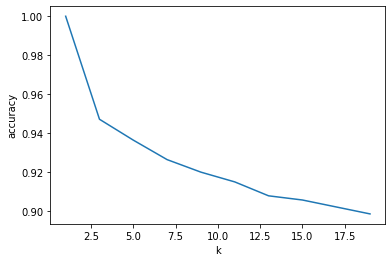

Knn Neighbor graph with Euclidean Equation used


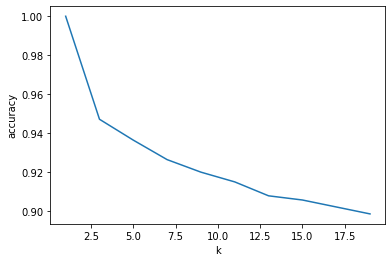

In [16]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
print("KNN Neighbor graph with Manhatten Equation used")
plt.plot(score_df['k'], score_df['accuracy'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

print("Knn Neighbor graph with Euclidean Equation used")
plt.plot(score_df2['k'], score_df['accuracy'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# Your results should match the results obtained from the library function (In-class activity) on using the same distance metric